In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
feature_heading = list()
with open('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_Dataset\\features.txt') as f:
    for line in tqdm(f.readlines()):
        #print(line)
        feature_heading.append(line.split()[1])
        


100%|██████████| 561/561 [00:00<00:00, 563324.05it/s]


In [3]:
len(feature_heading)

561

In [4]:
X_train = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\train\\X_train.txt', delim_whitespace=True, header=None, names=feature_heading)
X_train['subject'] = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\train\\subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\train\\y_train.txt', names=['Activity'], squeeze=True)
labels = y_train.map({1: 'walking', 2:'upstairs',3:'downstairs',4:'sitting', 5:'standing',6:'laying'})
sample_train = X_train
sample_train['activity_properties'] = y_train
sample_train['label'] = labels
sample_train.sample()

C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_properties,label
2258,0.27779,-0.018174,-0.109416,-0.991662,-0.960904,-0.956875,-0.992986,-0.96162,-0.960029,-0.930678,...,-0.007796,0.347876,0.219911,0.254244,-0.923064,0.095326,-0.039483,14,4,sitting


In [5]:
sample_train.shape

(7352, 564)

In [6]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\test\\X_test.txt', delim_whitespace=True, header=None, names=feature_heading)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\test\\subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\HumanActivityRecognition\\HAR\\UCI_HAR_dataset\\test\\y_test.txt', names=['Activity'], squeeze=True)
test_labels = y_test.map({1: 'walking', 2:'upstairs',3:'downstairs',4:'sitting', 5:'standing',6:'laying'})


# put all columns in a single dataframe
sample_test = X_test
sample_test['activity_properties'] = y_test
sample_test['label'] = test_labels
sample_test.sample()

C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_properties,label
1501,0.256421,-0.034675,-0.119232,-0.213404,0.093596,-0.47523,-0.2493,0.001226,-0.446711,-0.093649,...,0.131182,-0.128775,0.648156,0.937414,-0.759612,0.264118,0.010724,12,2,upstairs


In [7]:
sample_test.shape

(2947, 564)

In [8]:
print(sum(sample_train.duplicated()),sum(sample_test.duplicated()))

0 0


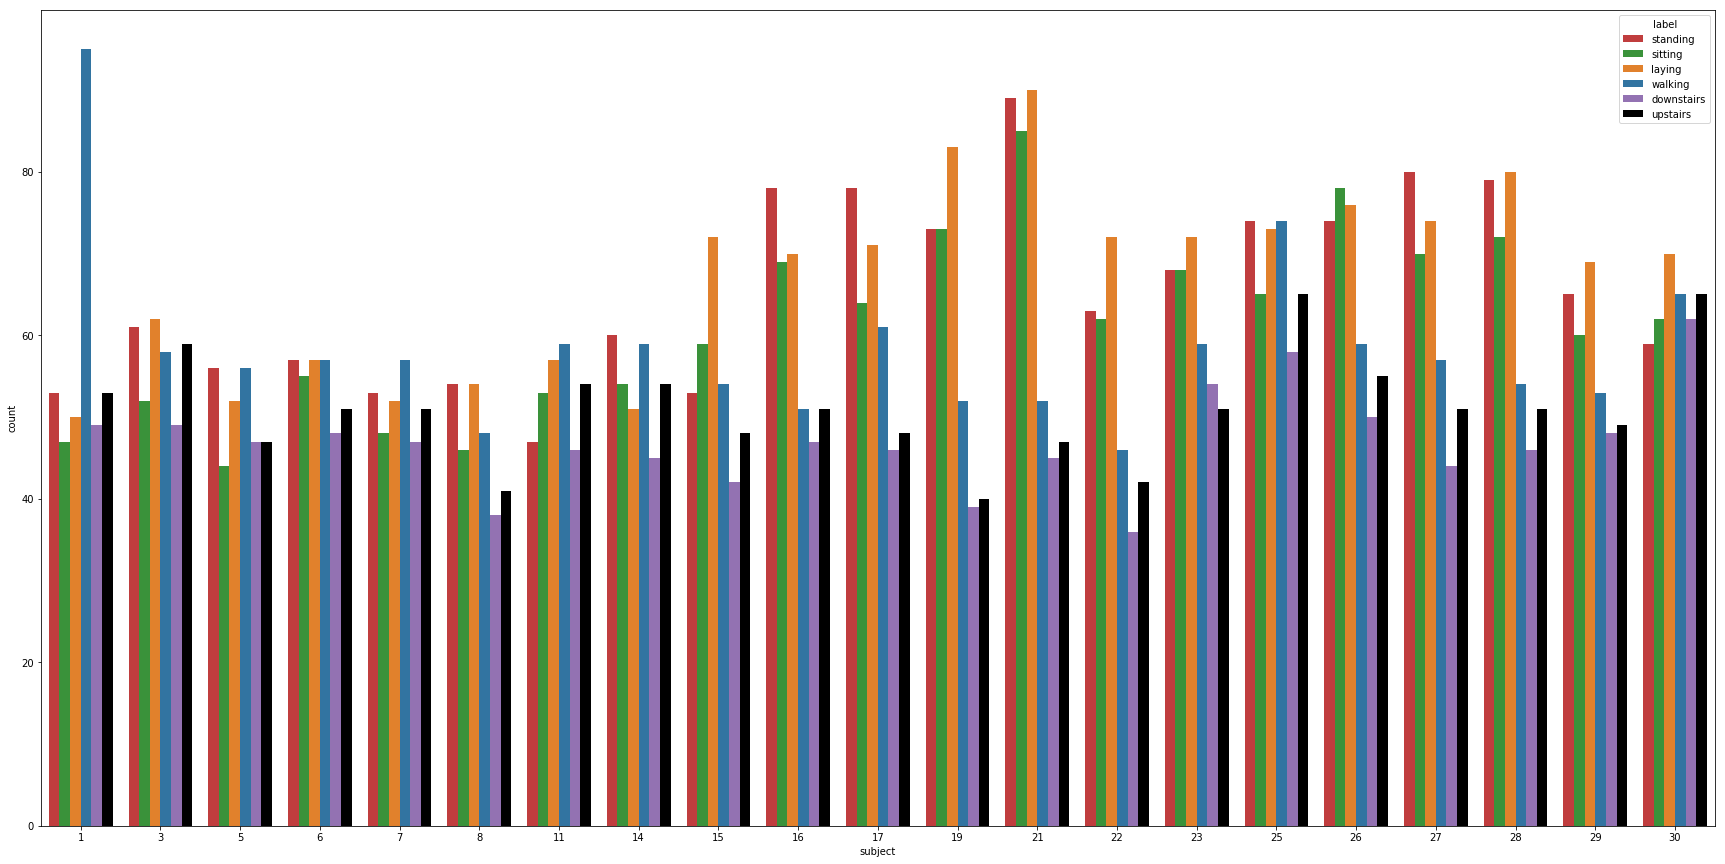

In [9]:
plt.figure(figsize=(30,15))
sns.countplot(x='subject',hue='label', data = sample_train,palette=["C3","C2","C1","C0","C4","k"])
plt.show()


In [10]:

sample_train.columns = sample_train.columns.str.replace('[()]','').str.replace('[-]', '').str.replace('[,]','')

sample_test.columns=sample_train.columns

In [11]:
sample_test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'activity_properties', 'label'],
      dtype='object', length=564)

In [12]:
sample_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'activity_properties', 'label'],
      dtype='object', length=564)

In [13]:
sample_train.to_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\train.csv', index=False)
sample_test.to_csv('C:\\Users\\DIVYANSH SHARMA\\Desktop\\test.csv', index=False)

In [14]:
print(sample_train.shape, sample_test.shape)


(7352, 564) (2947, 564)


In [15]:
sample_train=pd.read_csv("C:\\Users\\DIVYANSH SHARMA\\Desktop\\train.csv")

In [16]:
sample_test=pd.read_csv("C:\\Users\\DIVYANSH SHARMA\\Desktop\\test.csv")

In [17]:
sample_train.head

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
5          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
6          0.279454      -0.019641      -0.110022     -0.996921     -0.967186   
7          0.277432      -0.030488      -0.125360     -0.996559     -0.966728   
8          0.277293      -0.021751      -0.120751     -0.997328     -0.961245   
9          0.280586      -0.009960      -0.106065     -0.994803     -0.972758   
10         0.276880      -0.012722      -0.103438     -0.994815     -0.973077  

In [18]:
sample_test.head

<bound method NDFrame.head of       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.257178      -0.023285      -0.014654     -0.938404     -0.920091   
1          0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
2          0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
3          0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
4          0.274833      -0.027848      -0.129527     -0.993852     -0.967445   
5          0.279220      -0.018620      -0.113902     -0.994455     -0.970417   
6          0.279746      -0.018271      -0.104000     -0.995819     -0.976354   
7          0.274601      -0.025035      -0.116831     -0.995594     -0.982069   
8          0.272529      -0.020954      -0.114472     -0.996784     -0.975906   
9          0.275746      -0.010372      -0.099776     -0.998373     -0.986933   
10         0.278596      -0.015232      -0.098908     -0.998785     -0.981943  

In [19]:
sample_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,activity_properties,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,standing


In [20]:
sample_test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,activity_properties,label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,standing


In [21]:
X_train=sample_train.drop(['subject', 'activity_properties', 'label'], axis=1)
y_train = sample_train.label

In [22]:
X_test=sample_test.drop(['subject', 'activity_properties', 'label'], axis=1)
y_test = sample_test.label

In [23]:
labels=['walking','upstairs','downstairs','sitting','standing','laying']

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

In [25]:


def confusionMatrixPlotter(cm, classes,normalize=False,title='CONFUSION MATRIX'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in tqdm(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')

In [26]:
from datetime import datetime
def Modeller(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):

    results = dict()
    train_start_time = datetime.now()
    print('Model is being trained')
    model.fit(X_train, y_train)
    print('Finished \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time- {}\n\n'.format(results['training_time']))
    print('....predictions....')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Finished \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time- {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

    results['accuracy'] = accuracy
    
    print('Accuracy is:')
    
    print('\n    {}\n\n'.format(accuracy))
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('Confusion Matrix obtained...')
        print('\n {}'.format(cm))
        
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    confusionMatrixPlotter(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    results['model'] = model
    return results
    
    

In [27]:
def printGRIDvalues(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print(' After grid search best estimator obtained is:')
    print('\n\t\t{}\n'.format(model.best_estimator_))
    print('After grid searh best parameters obtained are:')
    print('Parameters of best estimator :\n\t{}\n'.format(model.best_params_))

    print('Cross Validations:')
    print('\n Total numbre of cross validation sets: {}\n'.format(model.n_splits_))
    print('\n Average Cross Validate scores of best estimator :\n\t{}\n'.format(model.best_score_))

    
    

In [28]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [29]:

# start Grid search
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)



Model is being trained
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.4min finished
C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Finished 

training_time- 0:01:30.123086


....predictions....
Finished 

testing time- 0:00:00.010972


Accuracy is:

    0.9630132337970818


Confusion Matrix obtained...

 [[409   0   0   0   8   3]
 [  0 537   0   0   0   0]
 [  0   1 428  58   4   0]
 [  0   0  11 520   0   1]
 [  0   0   0   0 449  22]
 [  1   0   0   0   0 495]]


36it [00:00, 4010.38it/s]


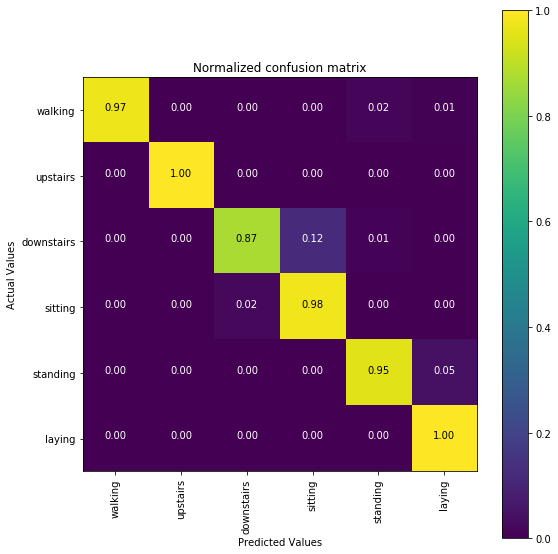

-------------------------
              precision    recall  f1-score   support

  downstairs       1.00      0.97      0.99       420
      laying       1.00      1.00      1.00       537
     sitting       0.97      0.87      0.92       491
    standing       0.90      0.98      0.94       532
    upstairs       0.97      0.95      0.96       471
     walking       0.95      1.00      0.97       496

   micro avg       0.96      0.96      0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [30]:
log_reg_grid_results =  Modeller(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

36it [00:00, 5156.76it/s]


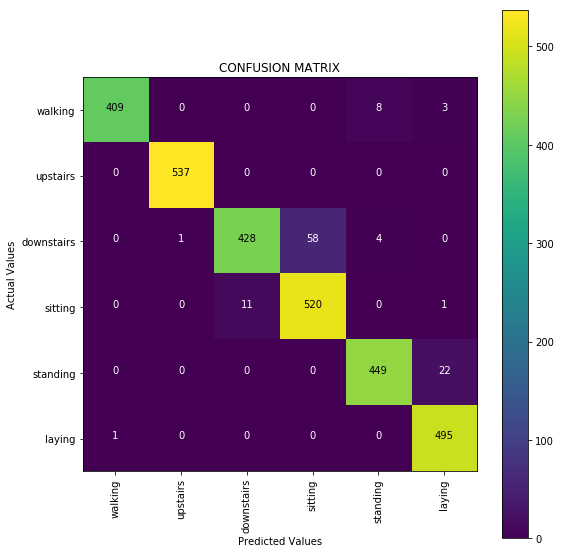

In [31]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
confusionMatrixPlotter(log_reg_grid_results['confusion_matrix'], classes=labels)
plt.show()

In [32]:
printGRIDvalues(log_reg_grid_results['model'])

 After grid search best estimator obtained is:

		LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

After grid searh best parameters obtained are:
Parameters of best estimator :
	{'C': 30, 'penalty': 'l2'}

Cross Validations:

 Total numbre of cross validation sets: 3


 Average Cross Validate scores of best estimator :
	0.9461371055495104



# ################

In [33]:
from sklearn.svm import LinearSVC

In [34]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

Model is being trained


C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:   20.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   21.5s finished
C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finished 

training_time- 0:00:25.438094


....predictions....
Finished 

testing time- 0:00:00.006982


Accuracy is:

    0.9670851713607058


Confusion Matrix obtained...

 [[413   0   0   0   5   2]
 [  0 537   0   0   0   0]
 [  0   2 429  57   3   0]
 [  0   0  13 519   0   0]
 [  1   0   0   0 456  14]
 [  0   0   0   0   0 496]]


36it [00:00, 3284.28it/s]


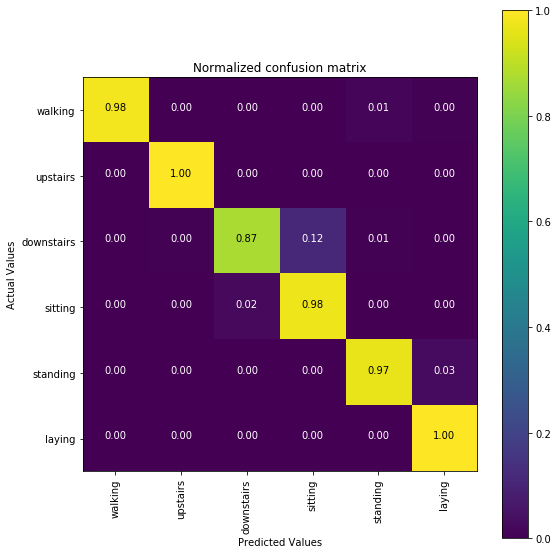

-------------------------
              precision    recall  f1-score   support

  downstairs       1.00      0.98      0.99       420
      laying       1.00      1.00      1.00       537
     sitting       0.97      0.87      0.92       491
    standing       0.90      0.98      0.94       532
    upstairs       0.98      0.97      0.98       471
     walking       0.97      1.00      0.98       496

   micro avg       0.97      0.97      0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [35]:
lr_svc_grid_results = Modeller(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [36]:
printGRIDvalues(lr_svc_grid_results['model'])

 After grid search best estimator obtained is:

		LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

After grid searh best parameters obtained are:
Parameters of best estimator :
	{'C': 2}

Cross Validations:

 Total numbre of cross validation sets: 3


 Average Cross Validate scores of best estimator :
	0.9460010881392819



############################

Model is being trained


C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Finished 

training_time- 0:05:08.898212


....predictions....
Finished 

testing time- 0:00:02.412548


Accuracy is:

    0.9623345775364778


Confusion Matrix obtained...

 [[397   0   0   0  19   4]
 [  0 537   0   0   0   0]
 [  0   0 441  48   2   0]
 [  0   0  12 520   0   0]
 [  1   0   0   0 453  17]
 [  3   0   0   0   5 488]]


36it [00:00, 4510.14it/s]


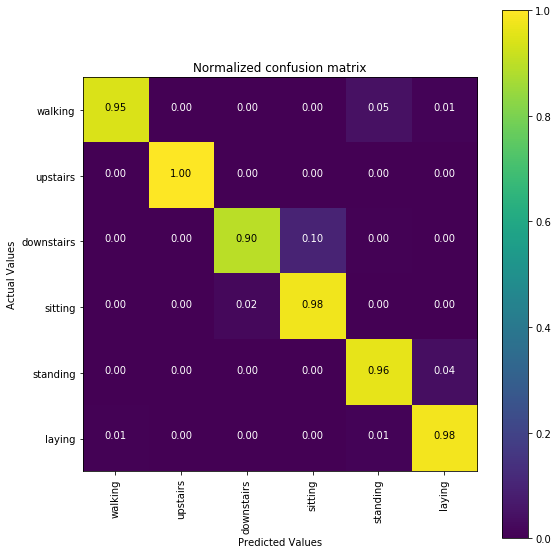

-------------------------
              precision    recall  f1-score   support

  downstairs       0.99      0.95      0.97       420
      laying       1.00      1.00      1.00       537
     sitting       0.97      0.90      0.93       491
    standing       0.92      0.98      0.95       532
    upstairs       0.95      0.96      0.95       471
     walking       0.96      0.98      0.97       496

   micro avg       0.96      0.96      0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [37]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = Modeller(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# ##############

In [38]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)


Model is being trained


C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Finished 

training_time- 0:00:05.083410


....predictions....
Finished 

testing time- 0:00:00.007978


Accuracy is:

    0.8646080760095012


Confusion Matrix obtained...

 [[345   0   0   0  61  14]
 [  0 537   0   0   0   0]
 [  0   0 386 105   0   0]
 [  0   0  93 439   0   0]
 [ 29   0   0   0 369  73]
 [ 16   0   0   0   8 472]]


36it [00:00, 3286.36it/s]


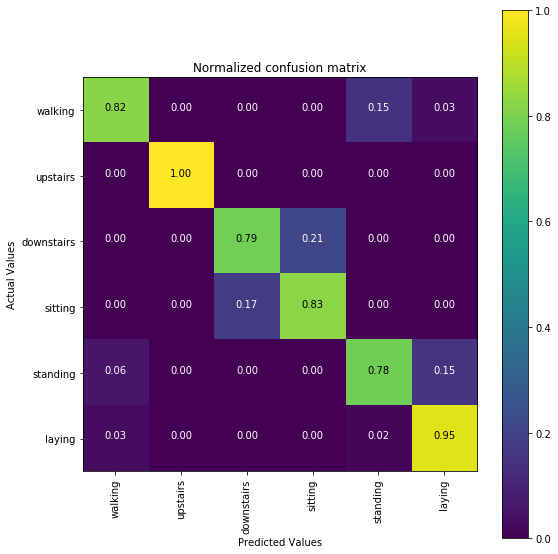

-------------------------
              precision    recall  f1-score   support

  downstairs       0.88      0.82      0.85       420
      laying       1.00      1.00      1.00       537
     sitting       0.81      0.79      0.80       491
    standing       0.81      0.83      0.82       532
    upstairs       0.84      0.78      0.81       471
     walking       0.84      0.95      0.89       496

   micro avg       0.86      0.86      0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947

 After grid search best estimator obtained is:

		DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

After grid searh best parameters 

In [39]:
dt_grid_results = Modeller(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
printGRIDvalues(dt_grid_results['model'])

# #####

Model is being trained


C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Finished 

training_time- 0:02:12.908741


....predictions....
Finished 

testing time- 0:00:00.072805


Accuracy is:

    0.9107567017305734


Confusion Matrix obtained...

 [[334   0   0   0  50  36]
 [  0 537   0   0   0   0]
 [  0   0 411  80   0   0]
 [  0   0  38 494   0   0]
 [  6   0   0   0 424  41]
 [ 10   0   0   0   2 484]]


36it [00:00, 4014.76it/s]


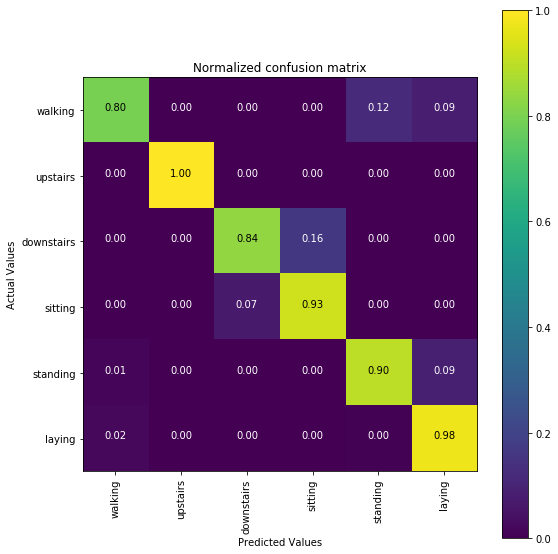

-------------------------
              precision    recall  f1-score   support

  downstairs       0.95      0.80      0.87       420
      laying       1.00      1.00      1.00       537
     sitting       0.92      0.84      0.87       491
    standing       0.86      0.93      0.89       532
    upstairs       0.89      0.90      0.90       471
     walking       0.86      0.98      0.92       496

   micro avg       0.91      0.91      0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947

 After grid search best estimator obtained is:

		RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, 

In [40]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = Modeller(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
printGRIDvalues(rfc_grid_results['model'])

# ##################

Model is being trained


C:\Users\DIVYANSH SHARMA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Finished 

training_time- 0:19:20.606823


....predictions....
Finished 

testing time- 0:00:00.095744


Accuracy is:

    0.9219545300305395


Confusion Matrix obtained...

 [[371   0   0   0  40   9]
 [  0 537   0   0   0   0]
 [  0   0 399  90   2   0]
 [  0   0  35 497   0   0]
 [  5   0   1   0 433  32]
 [  6   0   0   0  10 480]]


36it [00:00, 4010.60it/s]


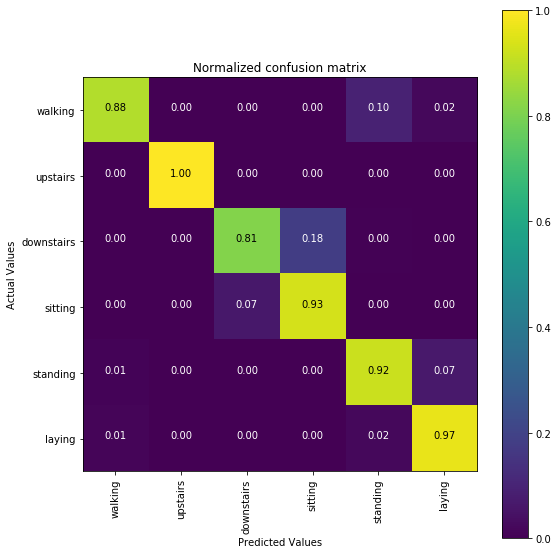

-------------------------
              precision    recall  f1-score   support

  downstairs       0.97      0.88      0.93       420
      laying       1.00      1.00      1.00       537
     sitting       0.92      0.81      0.86       491
    standing       0.85      0.93      0.89       532
    upstairs       0.89      0.92      0.91       471
     walking       0.92      0.97      0.94       496

   micro avg       0.92      0.92      0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947

 After grid search best estimator obtained is:

		GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_i

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = Modeller(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
printGRIDvalues(gbdt_grid_results['model'])

# Comparison

In [43]:
print('Logistic Regression :   Accuracy:{}%       Error:{}%'.format(log_reg_grid_results['accuracy'] * 100,100-(log_reg_grid_results['accuracy'] * 100)))
print('Linear SVC          :   Accuracy:{}%       Error:{}% '.format(lr_svc_grid_results['accuracy'] * 100,100-(lr_svc_grid_results['accuracy'] * 100)))
print('rbf SVM classifier  :   Accuracy:{}%      Error:{}% '.format(rbf_svm_grid_results['accuracy'] * 100,100-(rbf_svm_grid_results['accuracy'] * 100)))
print('DecisionTree        :   Accuracy:{}%      Error:{}% '.format(dt_grid_results['accuracy'] * 100,100-(dt_grid_results['accuracy'] * 100)))
print('Random Forest       :   Accuracy:{}%      Error:{}% '.format(rfc_grid_results['accuracy'] * 100,100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT :   Accuracy:{}%      Error:{}% '.format(rfc_grid_results['accuracy'] * 100,100-(rfc_grid_results['accuracy'] * 100)))

Logistic Regression :   Accuracy:96.30132337970818%       Error:3.6986766202918204%
Linear SVC          :   Accuracy:96.70851713607058%       Error:3.291482863929417% 
rbf SVM classifier  :   Accuracy:96.23345775364778%      Error:3.7665422463522162% 
DecisionTree        :   Accuracy:86.46080760095012%      Error:13.539192399049881% 
Random Forest       :   Accuracy:91.07567017305735%      Error:8.924329826942653% 
GradientBoosting DT :   Accuracy:91.07567017305735%      Error:8.924329826942653% 
